# Binning, Discretization, Linear Models, and Trees

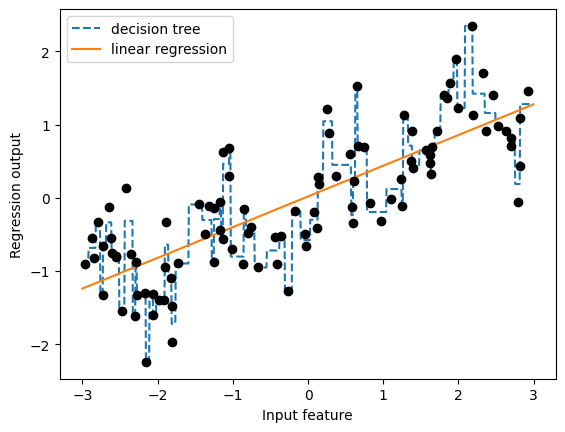

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree", linestyle="--")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


In [2]:
#For linear models a good way to make more powerful on continuous data is to use binning on the data
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")
#transform the single continuous input feature in the wave dataset into a categorical feature that encodes which bin a data point is in.
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [4]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder()
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print(f"X_binned.shape: {X_binned.shape}")

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 10)>
  Coords	Values
  (0, 3)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 5)	1.0
  (4, 1)	1.0
X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

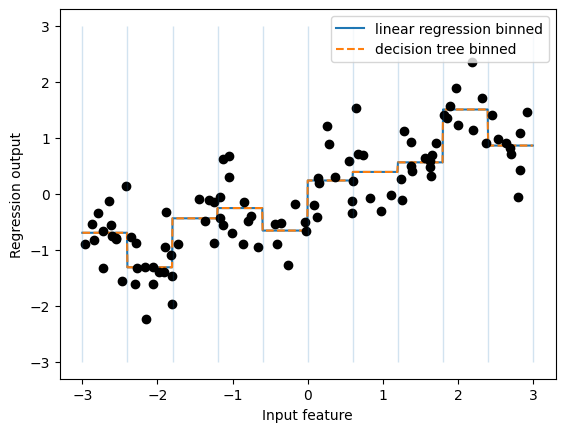

In [6]:
## Now we can fit a linear regression model to the binned data
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
#plot regression line for decision tree dashed
plt.plot(line, reg.predict(line_binned), label='decision tree binned', linestyle='--')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

**Binning features generally has no ben‐eficial effect for tree-based models**